In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("husl", 8)
sns.set_style('darkgrid')

In [3]:
df =  pd.read_csv(r'C:\Users\raman\Downloads\Bharat Intern Dataset\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

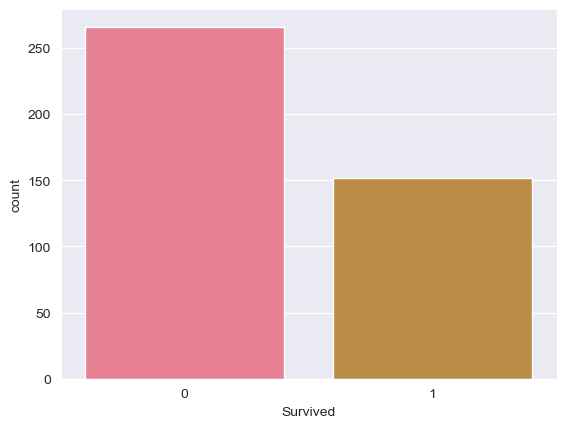

In [95]:
sns.countplot(x = 'Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

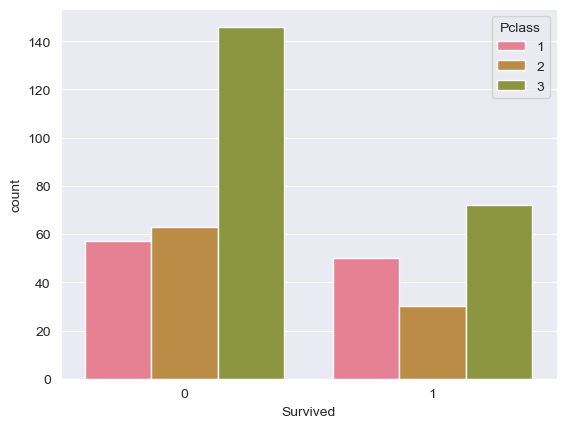

In [96]:
sns.countplot(x = 'Survived',hue = 'Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

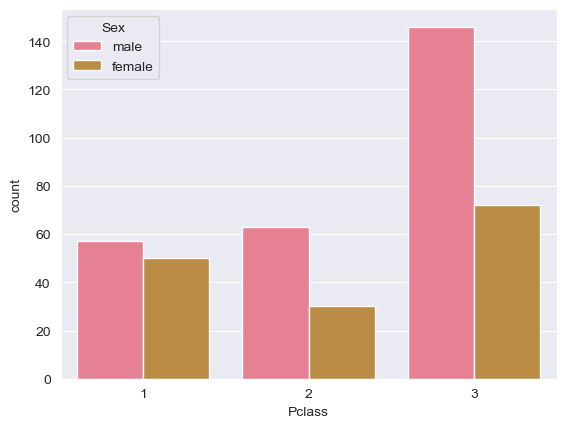

In [97]:
sns.countplot(x='Pclass',hue='Sex',data=df)

<Axes: xlabel='Age', ylabel='Count'>

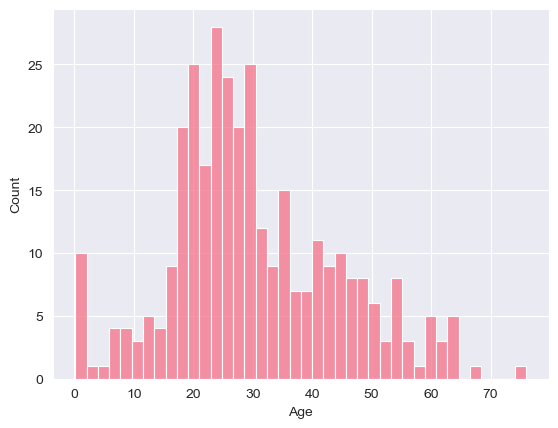

In [98]:
sns.histplot(df['Age'],bins=40)

<Axes: xlabel='Fare', ylabel='Count'>

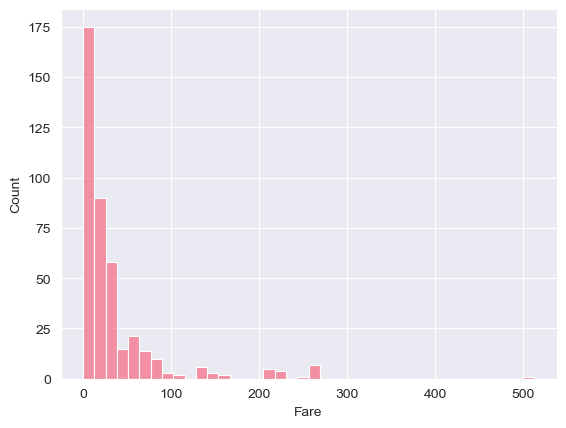

In [99]:
sns.histplot(df['Fare'],bins=40)

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


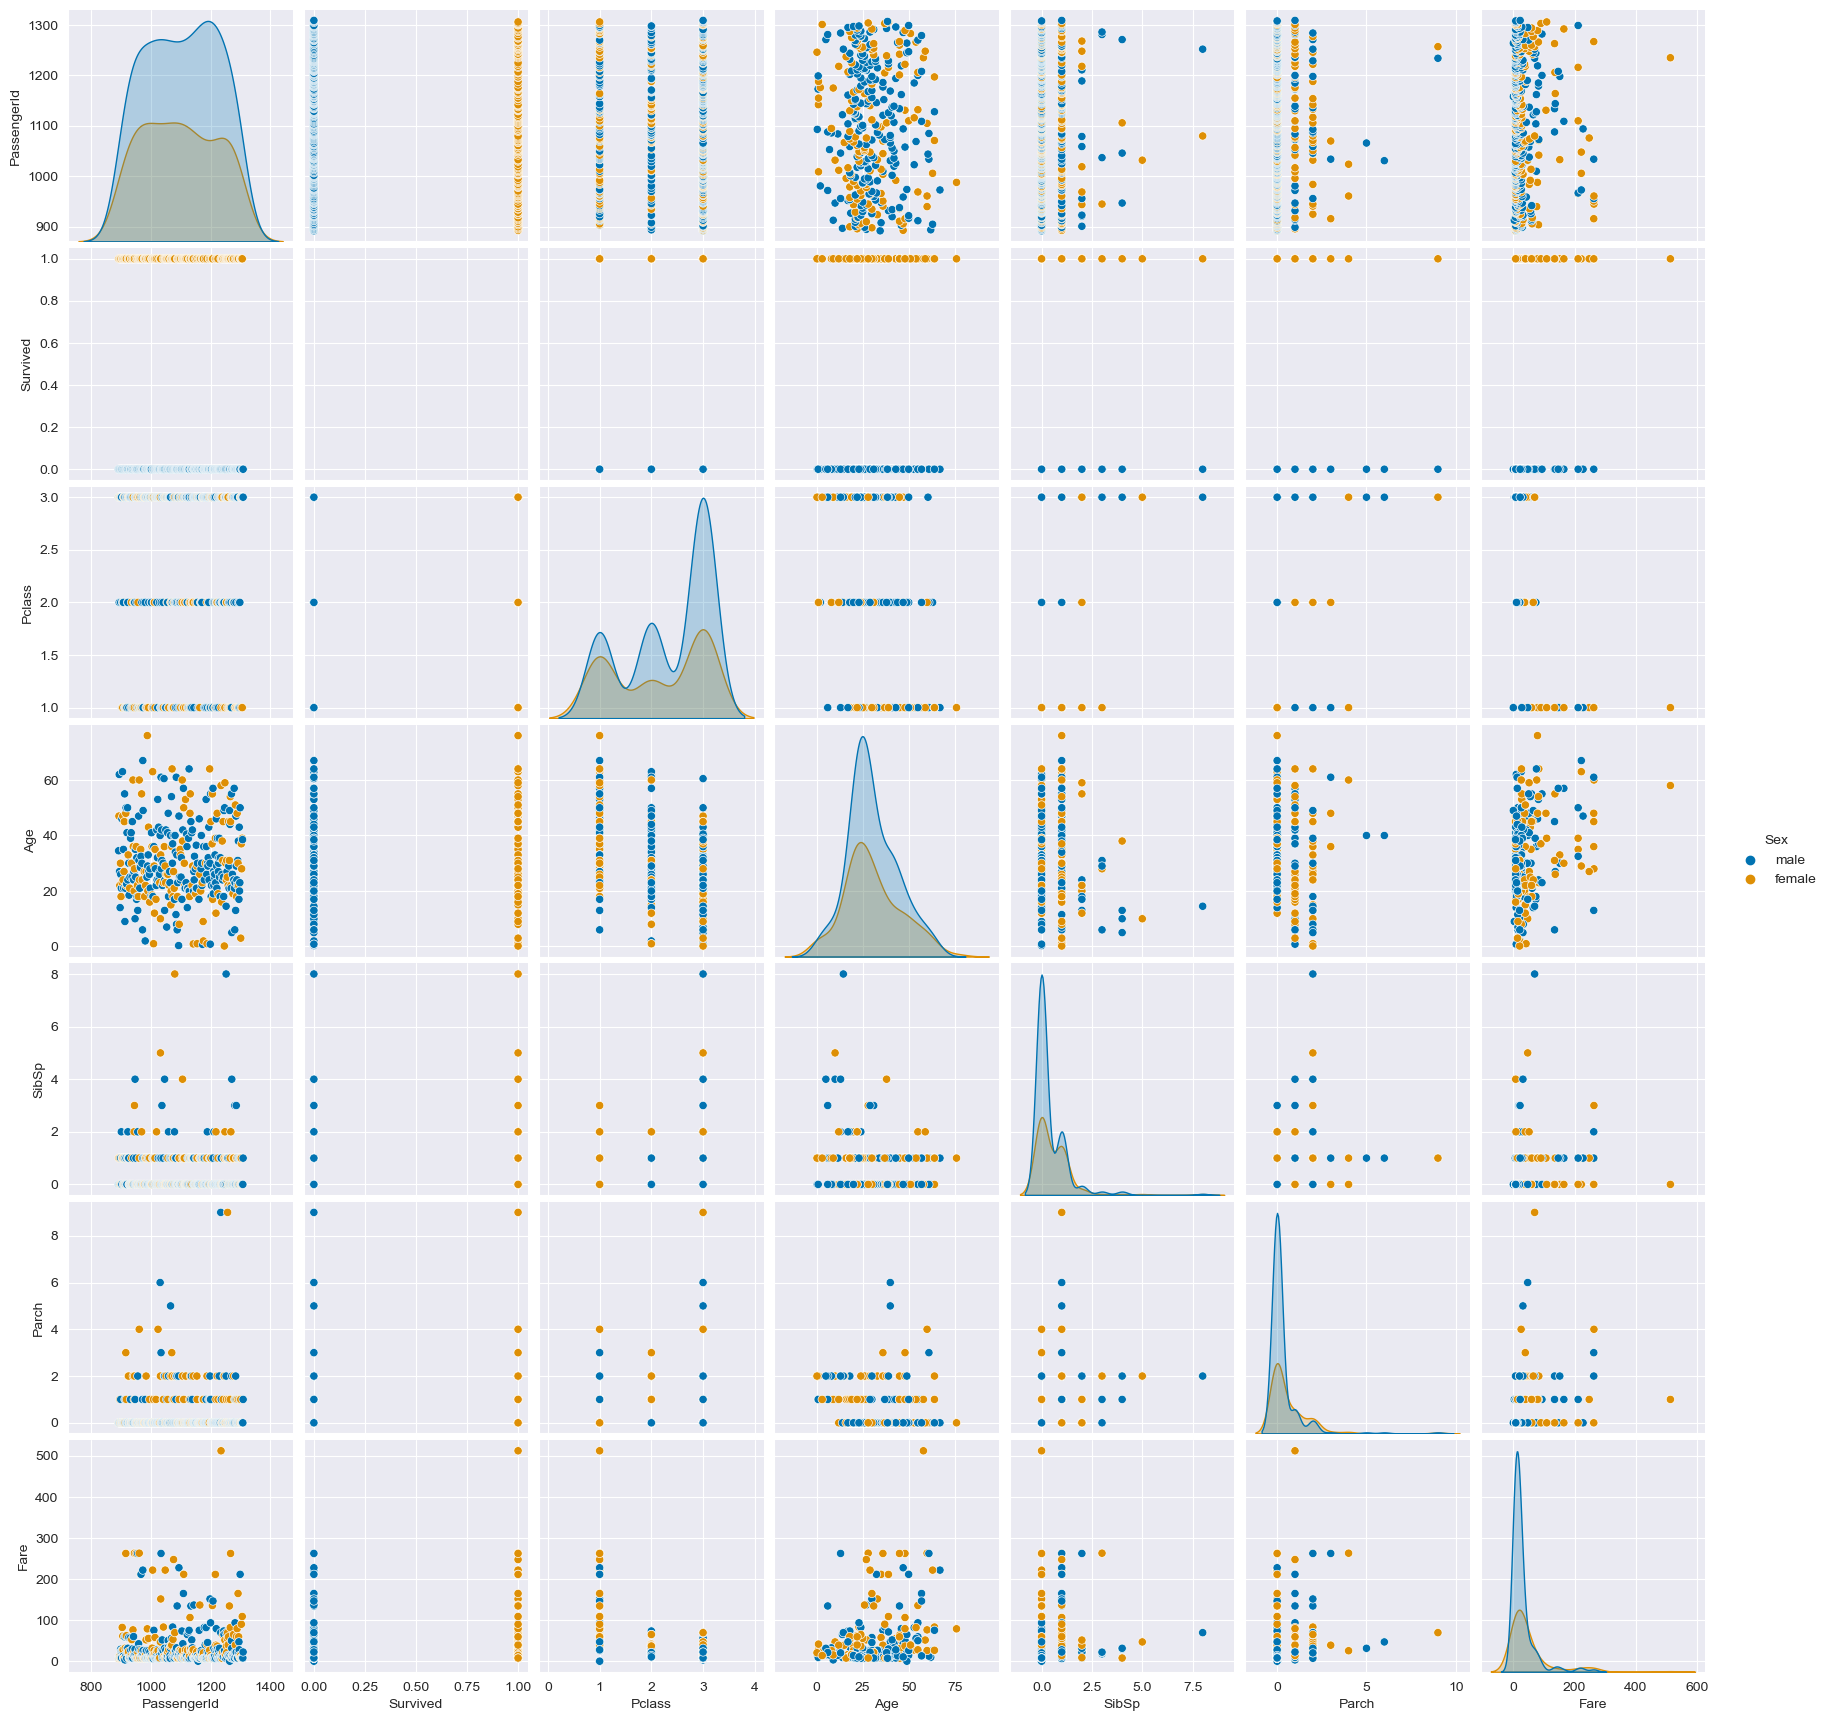

In [100]:
sns.pairplot(df,hue='Sex',palette='colorblind')

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


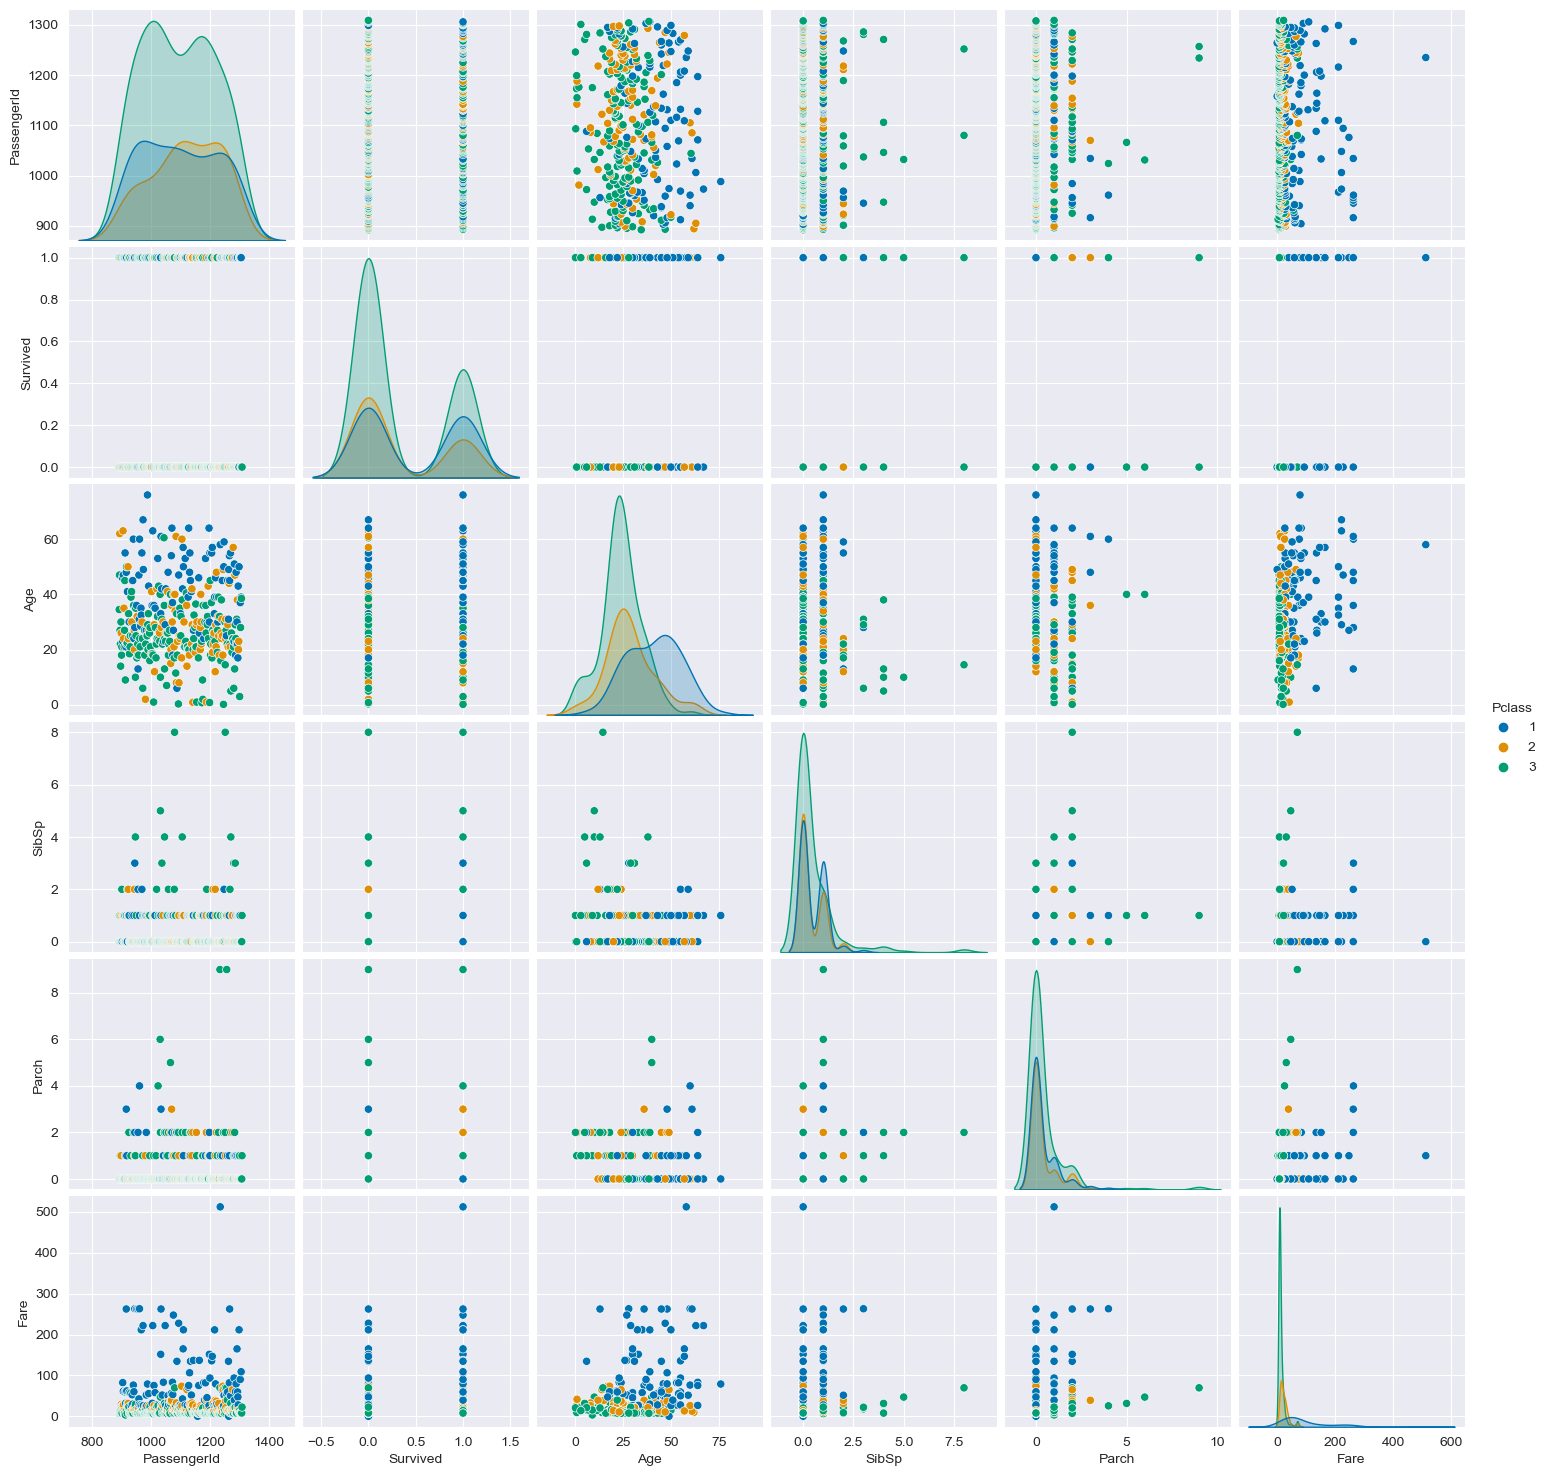

In [101]:
sns.pairplot(df,hue='Pclass',palette='colorblind')

# **Data Cleaning**

*Checking for Null Values*

In [102]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

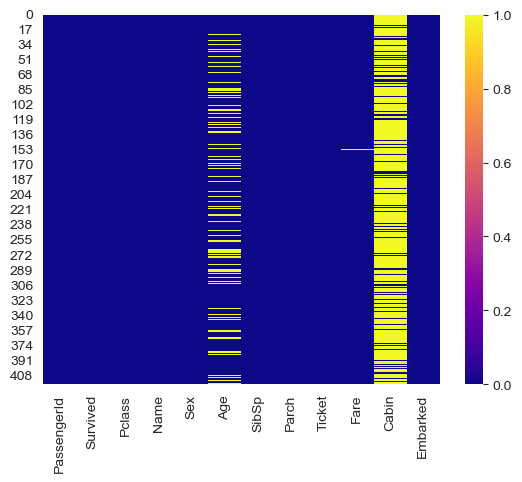

In [103]:
sns.heatmap(df.isnull(),cmap='plasma',cbar=True)

Note - There is clearly lot of missing values in Age and Cabin. While null values can be filled in Age using techniques like Box Plot, it is not possible to fill missing values in Cabin(as it is a textual data).

In [104]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

<Axes: xlabel='Pclass', ylabel='Age'>

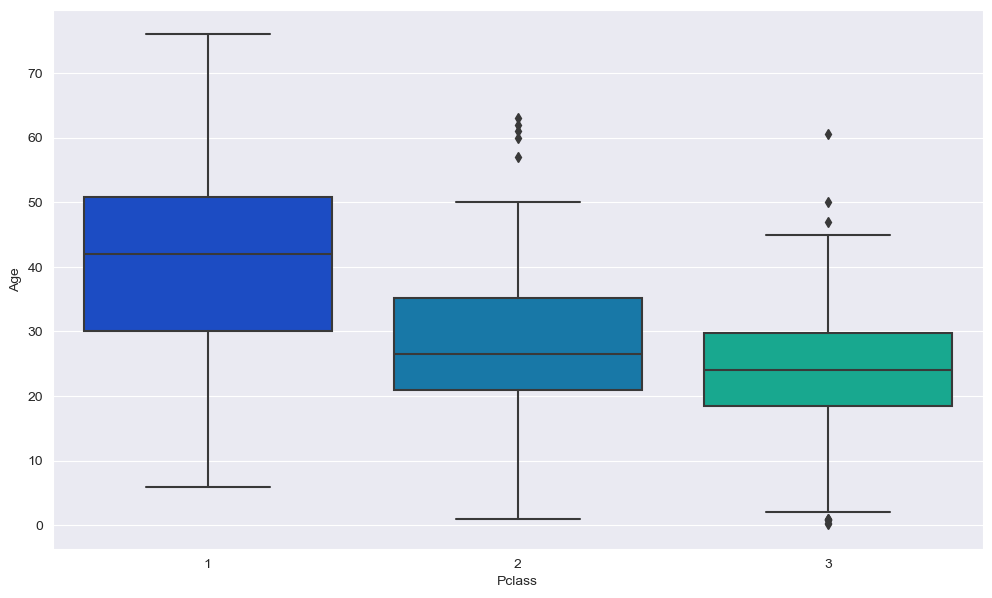

In [105]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

*We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.*

In [106]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [107]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [108]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [109]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

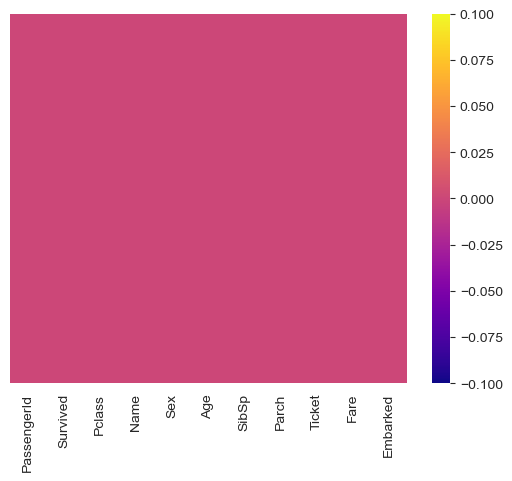

In [110]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma')

In [111]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [112]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,24.0,0,0,8.0500,S


In [113]:
df_new = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [114]:
df_new['Sex_female'] = df_new['Sex_female'].astype(int)
df_new['Sex_male'] = df_new['Sex_male'].astype(int)
df_new['Embarked_C'] = df_new['Embarked_C'].astype(int)
df_new['Embarked_Q'] = df_new['Embarked_Q'].astype(int)
df_new['Embarked_S'] = df_new['Embarked_S'].astype(int)

In [115]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,0,0,8.0500,0,1,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,1,0,0
415,0,3,38.5,0,0,7.2500,0,1,0,0,1
416,0,3,24.0,0,0,8.0500,0,1,0,0,1


# **Training with Different ML Algorithms**

In [116]:
df_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [117]:
X = df_new[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df_new['Survived']

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### K Nearest Neighbours

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=10)

In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [124]:
pred_knn = knn.predict(X_test)

In [125]:
print("Accuracy of Titanic Dataset using Knn = ",accuracy_score(y_test,pred_knn))

Accuracy of Titanic Dataset using Knn =  0.6666666666666666


In [126]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78        86
           1       0.69      0.21      0.32        52

    accuracy                           0.67       138
   macro avg       0.68      0.58      0.55       138
weighted avg       0.67      0.67      0.61       138



In [127]:
print(confusion_matrix(y_test,pred_knn))

[[81  5]
 [41 11]]


### Support Vector Machine

In [128]:
from sklearn.svm import SVC

In [129]:
svc = SVC(kernel='rbf')

In [130]:
svc.fit(X_train,y_train)

SVC()

In [131]:
pred_svc = svc.predict(X_test)

In [132]:
print("Accuracy of Titanic Dataset using SVC = ",accuracy_score(y_test,pred_svc))

Accuracy of Titanic Dataset using SVC =  0.6086956521739131


In [133]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        86
           1       0.38      0.06      0.10        52

    accuracy                           0.61       138
   macro avg       0.50      0.50      0.43       138
weighted avg       0.53      0.61      0.51       138



In [134]:
print(confusion_matrix(y_test,pred_svc))

[[81  5]
 [49  3]]


**Thank You!!!!!!**